# Selecting target sources from GAIA DR2
### https://ui.adsabs.harvard.edu/abs/2018A%26A...620A.128V/abstract

In [1]:
#### Conda environment
## environment terada2019
# conda create --name terada2019 python=3.7
# pip install --upgrade pip
# pip install astropy scipy
# pip install photutils
# pip install jupyter matplotlib h5py aplpy pyregion PyAVM healpy
# pip install astroquery
# pip install pandas
# pip install -U statsmodels
# pip install -U scikit-learn

In [2]:
import os
import sys
import time
sys.path
sys.path.append('./')

import numpy as np
from astropy import units as u
from astropy.io import fits
from astropy import coordinates
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from astroquery.alma import Alma
alma = Alma()
%matplotlib inline

In [3]:
!ls

asu.fits  gaiaHerbig.ipynb  test.pdf


In [4]:
# Loading FITS table
inFITS = 'asu.fits'
hdul = fits.open(inFITS)

hdul.fileinfo(0)

print( "number of tables: ", len(hdul) )

number of tables:  2


In [5]:
# print headers

for index in range(0, len(hdul) ):
    print( '#############   TABLE ' + str(index) + '   ##############' )
    hdr = hdul[index].header
    print( repr(hdr) )

#############   TABLE 0   ##############
SIMPLE  =                    T / Standard FITS Format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    0 / No Image --- just extension(s)                 
EXTEND  =                    T / There are standard extensions                  
ORIGIN  = 'xml2fits_v1.95'     / Converted from XML-Astrores to FITS            
                         e-mail: question@simbad.u-strasbg.fr                   
COMMENT  ARG='-rm'                                                              
LONGSTRN= 'OGIP 1.0'           / Long string convention (&/CONTINUE) may be used
DATE    = '2020-03-19'         / Written on 2020-03-19:04:48:06 (GMT)           
                             by: apache@vizier.u-strasbg.fr                     
         **********************************************************             
             EXCERPT from catalogues stored in VizieR (CDS)         

In [6]:
# list keys
datatab_id = 1
list( hdul[datatab_id].header.keys() )

['XTENSION',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'PCOUNT',
 'GCOUNT',
 'TFIELDS',
 'CDS-CAT',
 '',
 'EXTNAME',
 'CDS-NAME',
 '',
 '',
 'UCD__1',
 'TDISP1',
 'TFORM1',
 'TTYPE1',
 'UCD__2',
 'TDISP2',
 'TFORM2',
 'TTYPE2',
 '',
 'TUNIT2',
 'UCD__3',
 'TDISP3',
 'TFORM3',
 'TTYPE3',
 '',
 'TUNIT3',
 'UCD__4',
 'TDISP4',
 'TFORM4',
 'TTYPE4',
 'TUNIT4',
 'UCD__5',
 'TDISP5',
 'TFORM5',
 'TTYPE5',
 '',
 'TUNIT5',
 'UCD__6',
 'TDISP6',
 'TFORM6',
 'TTYPE6',
 'TUNIT6',
 'UCD__7',
 'TDISP7',
 'TFORM7',
 'TTYPE7',
 'TUNIT7',
 'UCD__8',
 'TDISP8',
 'TFORM8',
 'TTYPE8',
 'TUNIT8',
 'UCD__9',
 'TDISP9',
 'TFORM9',
 'TTYPE9',
 'TUNIT9',
 'UCD__10',
 'TDISP10',
 'TFORM10',
 'TTYPE10',
 '',
 'UCD__11',
 'TDISP11',
 'TFORM11',
 'TTYPE11',
 '',
 'UCD__12',
 'TDISP12',
 'TFORM12',
 'TTYPE12',
 '',
 'UCD__13',
 'TDISP13',
 'TFORM13',
 'TTYPE13',
 '',
 'TUNIT13',
 'UCD__14',
 'TDISP14',
 'TFORM14',
 'TTYPE14',
 '',
 'UCD__15',
 'TDISP15',
 'TFORM15',
 'TTYPE15',
 '',
 'UCD__16',
 'TDISP16',
 'TFO

In [7]:
# loading data into python structures
datatab_id = 1
num_AllSC = hdul[datatab_id].header['naxis2'] 

data = hdul[datatab_id].data
data.shape

# Listing available columns
hdul[1].columns

#print('###########')
#print( hdul[1].columns.names )

ColDefs(
    name = 'Name'; format = '13A'; disp = 'A13'
    name = 'RAICRS'; format = 'D'; unit = 'deg'; disp = 'F10.4'
    name = 'DEICRS'; format = 'D'; unit = 'deg'; disp = 'F9.4'
    name = 'plx'; format = 'D'; unit = 'mas'; disp = 'F9.6'
    name = 'Dist'; format = 'E'; unit = 'pc'; disp = 'F6.1'
    name = 'Teff'; format = 'J'; unit = 'K'; disp = 'I5'
    name = 'LogL'; format = 'E'; unit = '[Lsun]'; disp = 'F5.2'
    name = 'Av'; format = 'E'; unit = 'mag'; disp = 'F6.3'
    name = 'V'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'Bin'; format = '3A'; disp = 'A3'
    name = 'E_NIR_'; format = 'E'; disp = 'E10.3'
    name = 'E_MIR_'; format = 'E'; disp = 'E10.3'
    name = 'EWHa'; format = 'D'; unit = '0.1nm'; disp = 'F8.3'
    name = 'Hashape'; format = 'A'; disp = 'A1'
    name = 'Vi'; format = 'E'; disp = 'F5.2'
    name = 'UXOR'; format = '3A'; disp = 'A3'
    name = 'Mass'; format = 'E'; unit = 'Msun'; disp = 'F6.3'
    name = 'Age'; format = 'E'; unit = 'Myr'; dis

### Constructing selection criteria

In [8]:
mass = data['Mass']
mass_mask = (mass > 2.0) & (mass < 7.0)

distance = data['dist']
distance_mask = (distance < 500.0)

dec = data['DEICRS']
dec_mask = (dec > -65.0) & (dec < 20.0)

name = data['Name']
name_mask = (name != 'HD 50138' )

mask = mass_mask & distance_mask & dec_mask & name_mask
print('Number of selected sources : ', len(mask[mask == True] ) )

Number of selected sources :  29


### Print the properties of the selected sources

In [9]:
### Comments:
#### HD 176386 (CrA-54) is a source very close to TY CrA. [Need to re-observe.]
#### Good to present Spitzer image for TY CrA and HD 17386
#### see https://ui.adsabs.harvard.edu/abs/2011ApJ...736..137S/abstract
#### TY CrA: 0.91 mJy at 225 GHz; HD 176385: 0.48 mJy at 225 GHz

#### HD 50138 appears to be an AGB star [Need to remove.]

#### HR 5999 is Lupus III 53 (V856 Sco or Sz 108), 55.81 mJy at 345 GHz from Lupus survey
#### (1.2 minute per target for Lupus survey)
#### which was observed with ~0.22 arcsecond resolution [Need to re-observe.]

In [10]:
ra_array  = []
dec_array = []

for index in range(0, len(mask) ):
    if mask[index] == True:
        c = SkyCoord(ra=data['RAICRS'][index]*u.degree, 
                     dec=data['DEICRS'][index]*u.degree, 
                     frame='icrs')
        c_string = c.to_string('hmsdms')
        ra_array.append( data['RAICRS'][index] )
        dec_array.append( data['DEICRS'][index] )
        
        print( index,
               data['Name'][index], 
               c_string, 
               #round(data['RAICRS'][index],7), 
               #round(data['DEICRS'][index],7), 
               round(data['Dist'][index],1),
               round(data['Mass'][index],0),
               round(data['Teff'][index],0),
               round(10.0**(data['LogL'][index]), 0),
               data['E_NIR_'][index],
               data['E_MIR_'][index]
             )
        
        # checking duplication
        coord = coordinates.SkyCoord(
                                     data['RAICRS'][index]*u.deg, data['DEICRS'][index]*u.deg, 
                                     frame = 'fk5'
                                    )
        result = alma.query_region(coord, radius = (10.0 / 3600.0)*u.deg )
        print('Num of archival ALMA observations : ', len(result) , '\n')

10 CO Ori 05h27m38.3s +11d25m39s 404.0 3.0 6250 32.0 0.3109 0.1735
Num of archival ALMA observations :  0 

29 HD 101412 11h39m44.4s -60d10m28s 411.3 2.0 9750 38.0 0.1029 0.1839
Num of archival ALMA observations :  0 

33 HD 132947 15h04m56s -63d07m53s 381.6 2.0 10250 41.0 nan nan
Num of archival ALMA observations :  0 

43 HD 149914 16h38m28.6s -18d13m14s 158.8 3.0 10250 123.0 0.01343 0.001259
Num of archival ALMA observations :  0 

46 HD 158643 17h31m25s -23d57m46s 122.8 3.0 9800 166.0 0.01646 0.02269
Num of archival ALMA observations :  0 

49 HD 17081 02h44m07.3s -13d51m32s 106.7 4.0 13000 380.0 0.001977 0.000214
Num of archival ALMA observations :  0 

51 HD 176386 19h01m38.9s -36d53m27s 159.2 2.0 10700 38.0 0.03161 nan
Num of archival ALMA observations :  1 

52 HD 179218 19h11m11.3s +15d47m15s 266.0 3.0 9500 112.0 0.0383 0.1611
Num of archival ALMA observations :  0 

53 HD 199603 20h58m41.8s -14d29m00s 89.3 2.0 7380 25.0 nan 0.0004021
Num of archival ALMA observations :  0 

6

### Grouping into SGs

In [207]:
class MST_sphere:
    """
    Class for a minimum spanning tree on a spherical coordinate system.
    """
    
    def __init__(self, ra_coords, dec_coords):
        '''
        Inputs:
        
        ra_coords [1D numpy array] : ra-coordinates of the points in units of degree
        dec_coords [1D numpy array] : dec-coordinates of the points in units of degree
        '''
        
        self.ra_coords   = ra_coords
        self.dec_coords  = dec_coords
        self.num_points  = np.size(ra_coords)
        
        try:
            # An array to store the id of the nearest neighbor
            self.nearest_id     = np.zeros( self.num_points )
            self.nearest_length = np.zeros( self.num_points )
            
        except:
            print("No input data. Please check the input parameters.")
            
            
                 
    def __del__(self):
        pass
    
    
    
    def get_unitvec(self, ra, dec):
        """
        Returning a unit direction vector [x, y, z] based on the input ra and dec.
        
        Input :
        
        ra [float]  : ra in units of degree
        
        dec [float] : dec in units of degree
        
        
        Return :
        
        uvec [1D numpy array with 3-elements] : unit directional vector
        
        """
        deg_to_rad = np.pi / 180.0
        
        x = np.cos( dec * deg_to_rad ) * np.cos( ra * deg_to_rad )
        y = np.cos( dec * deg_to_rad ) * np.sin( ra * deg_to_rad )
        z = np.sin( dec * deg_to_rad )
        uvec = np.array( [x,y,z] )
        
        return uvec
    
    
    
    def get_radec(self, uvec):
        """
        Given the input unit direction vector,
        evalute the corresponding ra and dec in units of degree
        
        Input :
        
        uvec 0,1 [1D numpy array with 3-elements] : unit directional vector.
        
        
        Return :
        
        radec [1D numpy array with 2-elements] : ra and dec in units of degree
        
        """
        
        length = np.sqrt(   np.sum(uvec**2) )
        ra     = np.arctan( uvec[1] / uvec[0] ) * (180.0 / np.pi)
        dec    = np.arcsin( uvec[2] / length )  * (180.0 / np.pi)
        
        radec  = np.array( [ra, dec] )

        return radec
    
    
    
    def get_angsep(self, uvec0, uvec1):
        """
        Obtaining angular separation of two unit direction vectors.
        
        Input :
        
        uvec 0,1 [1D numpy array with 3-elements] : unit directional vector
        
        
        Return :
        
        angsep [float] : angular separation in units of degree
        """
        
        dot_product = np.sum(uvec0 * uvec1)
        angsep = np.arccos(dot_product) * (180.0 / np.pi)
        
        return angsep
        
         
    
    def find_nearest(self, length_threshold=360.0):
        """
        Find the neareast neighbor for each points.
        
        Keyword :
        
        length_threshold [float] : do not consider pairs which have angular
                                   separation larger than this threshold.
        
        """
        self.uvec_list   = []
        self.length_threshold = length_threshold
        
        for index0 in range(0, self.num_points):
            ra0   = self.ra_coords[index0]
            dec0  = self.dec_coords[index0]
            uvec0 =  self.get_unitvec(ra0, dec0)
            self.uvec_list.append(uvec0)
            
            nearest_id      = index0
            shortest_length = 0.0
            
            for index1 in range(0, self.num_points):
                if ( index0 != index1 ):
                    ra1    = self.ra_coords[index1]
                    dec1   = self.dec_coords[index1]
                    uvec1  = self.get_unitvec(ra1, dec1)
                    length = self.get_angsep(uvec0, uvec1)
                    # length = np.sqrt( (ra0-ra1)**2.0 + (dec0-dec1)**2.0 )
                    
                    if (nearest_id == index0):
                        nearest_id = index1
                        shortest_length = length
                    else:
                        if ( length < shortest_length ):
                            nearest_id = index1
                            shortest_length = length
                            
            self.nearest_id[index0]     = nearest_id
            self.nearest_length[index0] = shortest_length
    

    def plot_points(self):
        
        # initialize the figure
        fig = plt.figure(figsize=[6.0,6.0])
        ax  = fig.add_axes([0.1, 0.1, 0.95, 0.95], projection='3d')
        ax.set_aspect('auto')
        plt.axis('off')

        # set viewing angle
        elev = 5.0
        rot  = -60.0
        
        # draw the unit sphere (surface)
        ## making the theta/phi coordinate grids
        ra_grid = np.linspace(0, 2 * np.pi, 100)
        dec_grid = np.linspace(0, np.pi, 100)  # 0-deg in north pole, 180 deg in south pole

        # draw the unit sphere (surface)
        x = 1 * np.outer( np.cos(ra_grid), np.sin(dec_grid) )
        y = 1 * np.outer(np.sin(ra_grid), np.sin(dec_grid))
        z = 1 * np.outer(np.ones(np.size(ra_grid)), np.cos(dec_grid))
        ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=(0.75,0.75,0.75), linewidth=0, alpha=0.3)
        
        # plotting the font-side dec circle
        ra_circ    = np.zeros( 100 ) + rot * (np.pi / 180.0)
        theta_circ = np.linspace(0, np.pi, 100) + elev * (np.pi / 180.0)
        x_circ     = np.sin(theta_circ) * np.cos(ra_circ)
        y_circ     = np.sin(theta_circ) * np.sin(ra_circ)
        z_circ     = np.cos(theta_circ)
        ax.plot(x_circ, y_circ, z_circ, color=(0.2,0.2,0.2,1), 
                linestyle = '-',
                linewidth=1.0)
        
        # plotting the back-side dec circle
        ra_circ    = np.zeros( 100 ) + np.pi + rot * (np.pi / 180.0)
        theta_circ = np.linspace(0, np.pi, 100) - elev * (np.pi / 180.0)
        x_circ     = np.sin(theta_circ) * np.cos(ra_circ)
        y_circ     = np.sin(theta_circ) * np.sin(ra_circ)
        z_circ     = np.cos(theta_circ)
        ax.plot(x_circ, y_circ, z_circ, color=(0.5,0.5,0.5,1), 
                linestyle = '--', 
                linewidth=1.0)
        
        # plotting the front-side ra circle
        ra_circ    = np.linspace(0, np.pi, 100) - 90.0 * (np.pi / 180.0)
        theta_circ = np.zeros( 100 ) + np.pi*0.5 + 0.0 * (np.pi / 180.0)
        x_circ     = np.sin(theta_circ) * np.cos(ra_circ)
        y_circ     = np.sin(theta_circ) * np.sin(ra_circ)
        z_circ     = np.cos(theta_circ)
        ax.plot(x_circ, y_circ, z_circ, color=(0.2,0.2,0.2,1), 
                linestyle = '-',
                linewidth=1.0)
        
        # plotting the back-side ra circle
        ra_circ    = np.linspace(np.pi, 2.0*np.pi, 100) - 90.0 * (np.pi / 180.0)
        theta_circ = np.zeros( 100 ) + np.pi*0.5 + 0.0 * (np.pi / 180.0)
        x_circ     = np.sin(theta_circ) * np.cos(ra_circ)
        y_circ     = np.sin(theta_circ) * np.sin(ra_circ)
        z_circ     = np.cos(theta_circ)
        ax.plot(x_circ, y_circ, z_circ, color=(0.5,0.5,0.5,1), 
                linestyle = '--',
                linewidth=1.0)

        # plotting data points
        for index in range(0, len(self.uvec_list)):
            
            uvec     = self.uvec_list[index]
            radec    = self.get_radec(uvec)
            ra  = radec[0] + rot
            
            # evalute polar angle theta
            if ( radec[1] > 0 ):
                theta = 90.0 - radec[1]
            else:
                theta = -1.0 * (radec[1]) + 90.0
            
            ra    = ra    * (np.pi / 180.0)
            theta = theta * (np.pi / 180.0)
            
            x     = np.sin(theta) * np.cos(ra)
            y     = np.sin(theta) * np.sin(ra)
            z     = np.cos(theta)

            if ( x > 0 ):
                color = (0,0,1,1)
                size  = 5
            else:
                color = (0,0.5,1,0.5)
                size  = 3
            
            ax.scatter(x, y, z, 
                       zdir='z', s=size, c=color)
            
            # plot connection with the nearest neighbor
            nearest_id = int(self.nearest_id[index])
            length     = self.nearest_length[index]
            if ( length < self.length_threshold ):
                uvec     = self.uvec_list[nearest_id]
                radec    = self.get_radec(uvec)
                ra  = radec[0] + rot

                # evalute polar angle theta
                if ( radec[1] > 0 ):
                    theta = 90.0 - radec[1]
                else:
                    theta = -1.0 * (radec[1]) + 90.0

                ra    = ra    * (np.pi / 180.0)
                theta = theta * (np.pi / 180.0)

                x1     = np.sin(theta) * np.cos(ra)
                y1     = np.sin(theta) * np.sin(ra)
                z1     = np.cos(theta)
                ax.plot([x, x1], [y, y1], [z, z1], color=(1,0,0,1), 
                        linestyle = '-',
                        linewidth=1.0)

        ax.view_init(elev = -elev, azim = 0)

        plt.show()
        fig.savefig('test.pdf') 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[13.  2.  1.  4.  3. 23. 25. 28. 25. 16. 16.  9. 26.  0. 15. 14. 10. 18.
 17. 24. 27. 20.  3. 12. 15.  6. 27. 26.  7.]
[5.73956522e+00 2.38742981e+01 2.38742981e+01 1.36081364e+01
 1.36081364e+01 3.67650746e+01 1.60262498e-02 1.88181618e+01
 3.43289968e+01 2.94174240e+00 1.46611016e+00 4.60789110e+00
 2.69378885e+00 5.73956522e+00 1.42130654e-01 1.42130654e-01
 1.46611016e+00 6.37238884e-01 6.37238884e-01 1.89312800e+00
 1.11855389e+01 1.96442478e+01 2.18696715e+01 7.17300822e+00
 1.69213601e-01 1.60262498e-02 8.47798607e-01 8.47798607e-01
 1.88181618e+01]


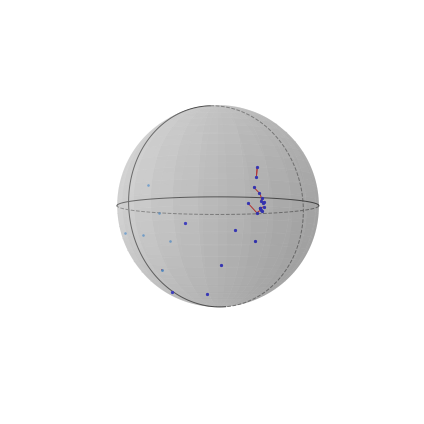

In [211]:
ra_array  = np.array(ra_array)
dec_array = np.array(dec_array)

alma2020sg = MST_sphere(ra_array, dec_array)
alma2020sg.find_nearest(length_threshold=10.0)
print( alma2020sg.nearest_id )
print( alma2020sg.nearest_length )

alma2020sg.plot_points()

In [212]:
print(np.pi)

3.141592653589793


In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(a ** 2)